In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from itertools import product
from matplotlib  import pyplot as plt
import japanize_matplotlib

path = 'data/CoVid19-Japan-weekly_patients_by_age.csv'
df = pd.read_csv(path, header=[0,1], index_col=0, parse_dates=[0])
df = df.sort_index(ascending=True)

In [23]:
df.index

DatetimeIndex(['2020-11-25', '2020-12-02', '2020-12-09', '2020-12-16',
               '2020-12-23', '2020-12-29', '2021-01-06', '2021-01-13',
               '2021-01-20', '2021-01-27', '2021-02-03', '2021-02-10',
               '2021-02-17', '2021-02-24', '2021-03-03', '2021-03-10',
               '2021-03-17', '2021-03-24', '2021-03-31', '2021-04-07',
               '2021-04-14', '2021-04-21', '2021-04-28', '2021-05-05',
               '2021-05-12', '2021-05-19', '2021-05-26', '2021-06-02',
               '2021-06-09', '2021-06-16', '2021-06-23', '2021-06-30',
               '2021-07-07', '2021-07-14', '2021-07-21', '2021-07-28',
               '2021-08-04', '2021-08-11', '2021-08-18', '2021-08-25',
               '2021-09-01', '2021-09-08', '2021-09-15', '2021-09-22',
               '2021-09-28', '2021-10-05', '2021-10-12', '2021-10-19',
               '2021-10-26', '2021-11-02', '2021-11-09', '2021-11-16',
               '2021-11-23', '2021-11-30', '2021-12-07', '2021-12-14',
      

/var/folders/8x/ly2rk4qj673f9qx0s2tc7nh80000gn/T/ipykernel_59182/3856035231.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax7.set_yticklabels(["{:d}".format(int(n)) for n in ax6.get_yticks()])


(18591.0, 19094.0)

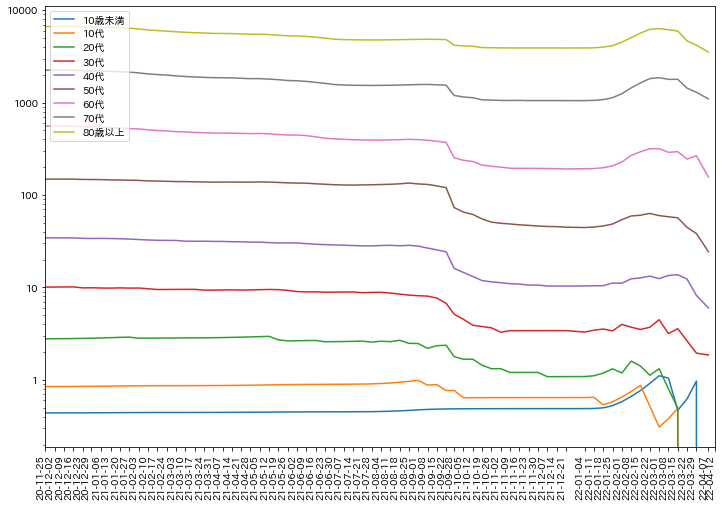

In [22]:
fig, ax7 = plt.subplots(1,1,figsize=(12,9))
nc=df["陽性者数"].loc[:,:"80歳以上"][::-1].diff().dropna().astype(int).cumsum()[::-1]
nd=df["死亡者数"].loc[:,:"80歳以上"][::-1].diff().dropna().astype(int).cumsum()[::-1]
(nd/nc*1e6).plot(ax=ax7, xticks=df.index, rot=90)
ax7.set_yscale('log')
ax7.set_yticklabels(["{:d}".format(int(n)) for n in ax6.get_yticks()])
ax7.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax7.legend(loc='upper left')
ax7.set_xlim(df.index[0], df.index[-1])

/var/folders/8x/ly2rk4qj673f9qx0s2tc7nh80000gn/T/ipykernel_59182/4258808850.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax6.set_yticklabels(["{:d}".format(int(n)) for n in ax6.get_yticks()])
/var/folders/8x/ly2rk4qj673f9qx0s2tc7nh80000gn/T/ipykernel_59182/4258808850.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax7.set_yticklabels(["{:d}".format(int(n)) for n in ax6.get_yticks()])


Wrote: fig/CoVid19-Japan-patients_by_age.png


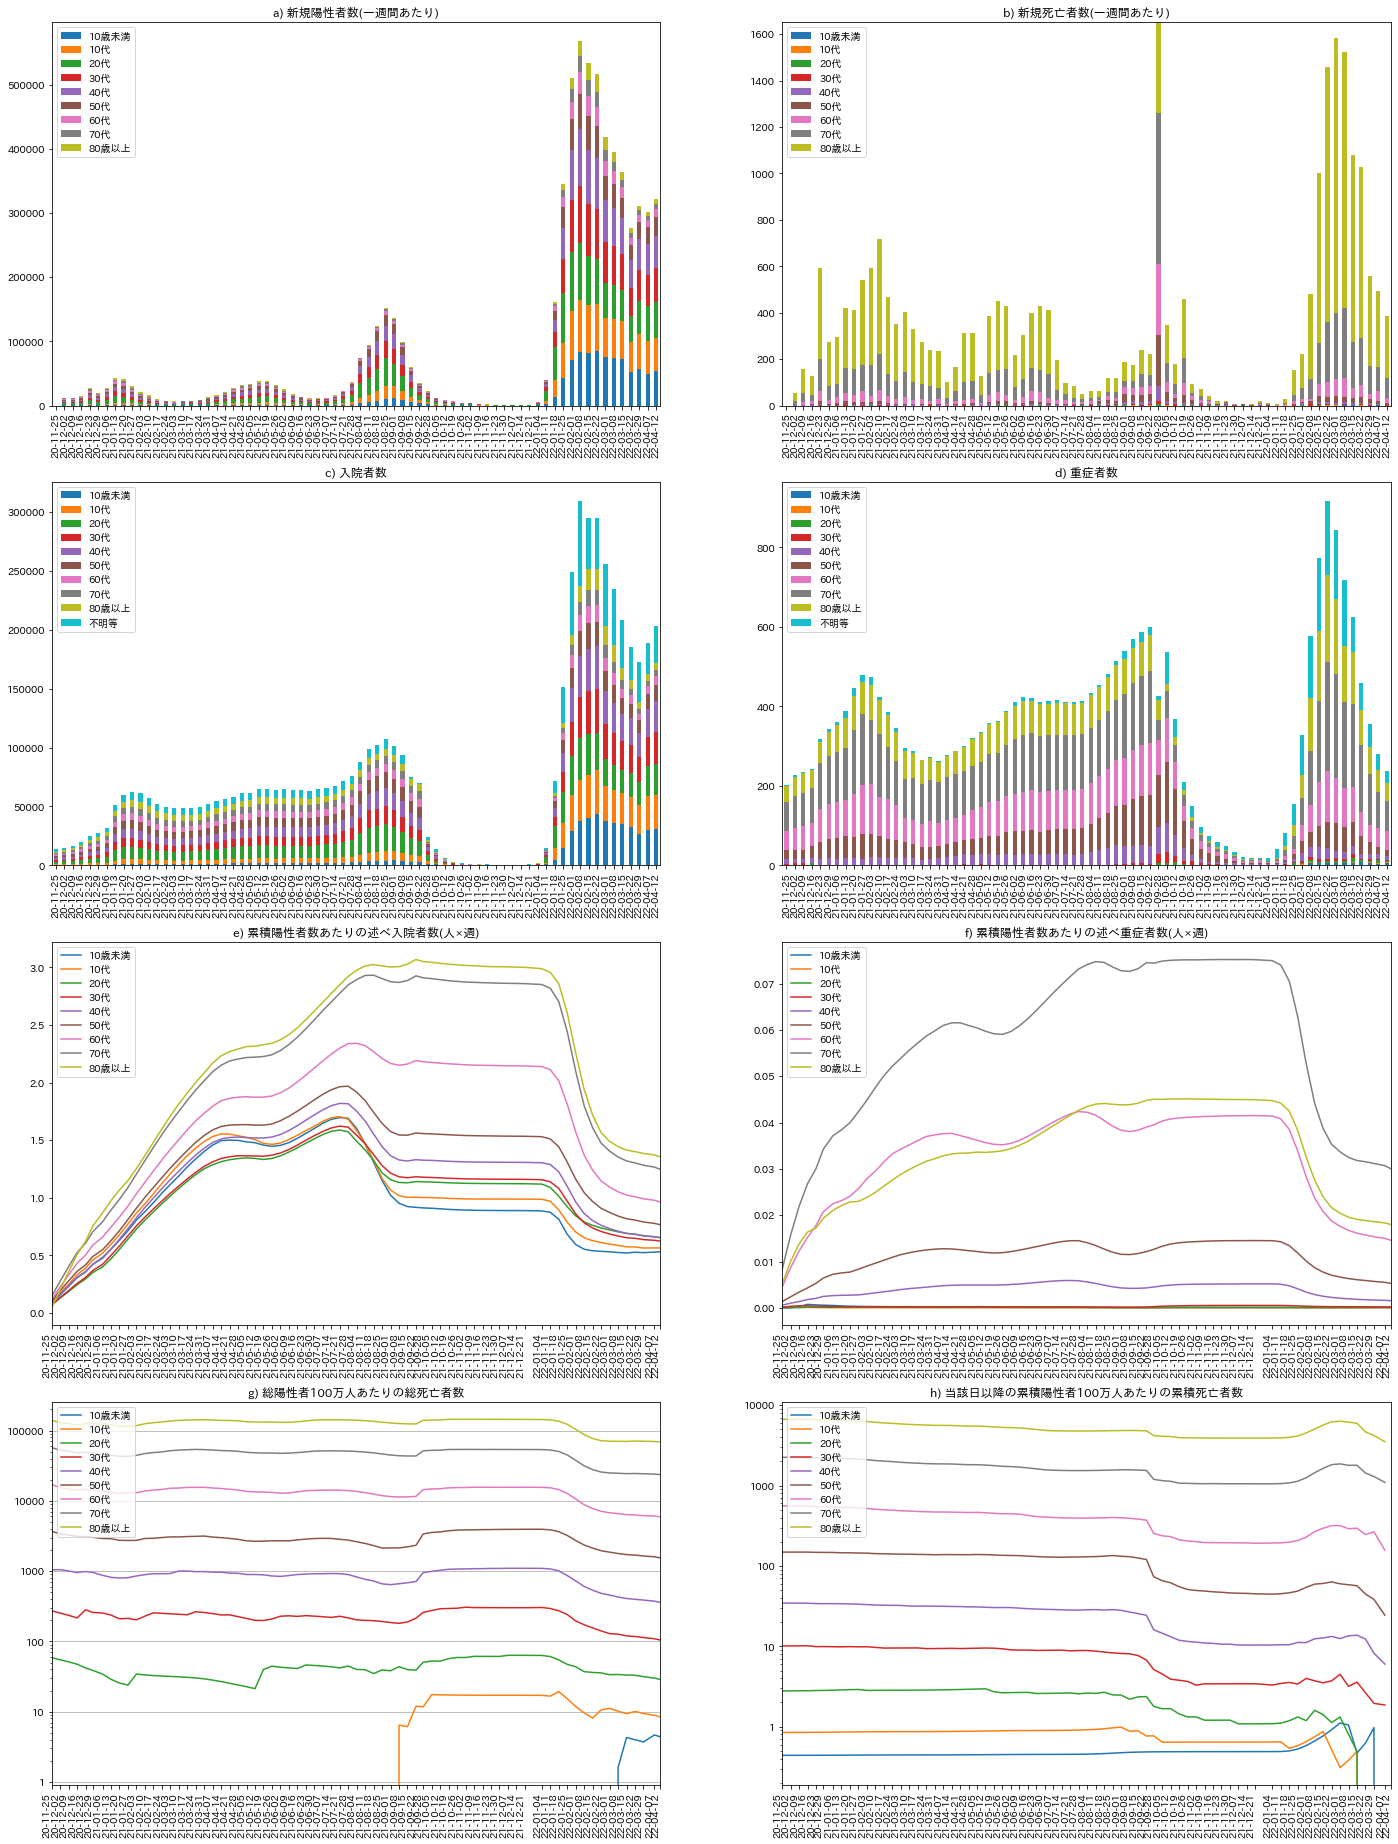

In [24]:
fig, ax = plt.subplots(4,2,figsize=(12*2,9*4))
ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7 = ax[0,0], ax[0,1], ax[1,0], ax[1,1], ax[2,0], ax[2,1], ax[3,0], ax[3,1]
# 1行目
df["陽性者数"].loc[:,:"80歳以上"].diff().plot(kind='bar', stacked="True",ax=ax0)
ax0.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax0.set_title("a) 新規陽性者数(一週間あたり)")
df["死亡者数"].loc[:,:"80歳以上"].diff().plot(kind='bar', stacked="True", ax=ax1)
ax1.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax1.set_title("b) 新規死亡者数(一週間あたり)")
df1 = df["死亡者数"].loc[:,"合計"].diff().dropna()
ylim1 = df1[df1.index!=dt.datetime(2021,9,28)].max()
ax1.set_ylim((0,ylim1))
# 2行目
df["入院者数"].loc[:,:"不明等"].plot(kind='bar', stacked="True", ax=ax2)
ax2.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax2.set_title("c) 入院者数")
df["重症者数"].loc[:,:"不明等"].plot(kind='bar', stacked="True", ax=ax3)
ax3.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax3.set_title("d) 重症者数")
# 3行目
(df["入院者数"].loc[:,:"80歳以上"].cumsum()/df["陽性者数"].loc[:,:"80歳以上"]).plot(ax=ax4, xticks=df.index, rot=90)
ax4.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax4.set_title("e) 累積陽性者数あたりの述べ入院者数(人×週)")
ax4.set_xlim(df.index[0], df.index[-1])
(df["重症者数"].loc[:,:"80歳以上"].cumsum()/df["陽性者数"].loc[:,:"80歳以上"]).plot(ax=ax5, xticks=df.index, rot=90)
ax5.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax5.set_title("f) 累積陽性者数あたりの述べ重症者数(人×週)")
ax5.set_xlim(df.index[0], df.index[-1])
# 4行目
#(df["重症者数"].loc[:,:"80歳以上"]/df["入院者数"].loc[:,:"80歳以上"]).plot(ax=ax6, xticks=df.index, rot=90)
#ax6.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
#ax6.set_title("g) 入院者数に対する重症者数の比率")
#ax6.legend(loc="upper left")
#ax6.grid(axis='y')
#ax6.set_ylim((0,0.04))
#ax6.set_xlim(df.index[0], df.index[-1])

cases_reg=df["陽性者数"].loc[:,:"80歳以上"]/1e6
(df["死亡者数"].loc[:,:"80歳以上"]/cases_reg).plot(ax=ax6, xticks=df.index, rot=90)
ax6.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax6.set_title("g) 総陽性者100万人あたりの総死亡者数")
ax6.legend(loc="upper left")
ax6.grid(axis='y')
ax6.set_yscale('log')
ax6.set_yticklabels(["{:d}".format(int(n)) for n in ax6.get_yticks()])
ax6.set_xlim(df.index[0], df.index[-1])
#print(np.array(ax6.get_yticks()))
#print(ax6.get_yticklabels())

nc=df["陽性者数"].loc[:,:"80歳以上"][::-1].diff().dropna().astype(int).cumsum()[::-1]
nd=df["死亡者数"].loc[:,:"80歳以上"][::-1].diff().dropna().astype(int).cumsum()[::-1]
(nd/nc*1e6).plot(ax=ax7, xticks=df.index, rot=90)
ax7.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax7.set_title("h) 当該日以降の累積陽性者100万人あたりの累積死亡者数")
ax7.set_yscale('log')
ax7.set_yticklabels(["{:d}".format(int(n)) for n in ax6.get_yticks()])
ax7.legend(loc='upper left')
ax7.set_xlim(df.index[0], df.index[-1])

fig.savefig("fig/CoVid19-Japan-patients_by_age.png", bbox_inches='tight')
print("Wrote: fig/CoVid19-Japan-patients_by_age.png")
#plt.show()

In [35]:
bar1

<AxesSubplot:title={'center':'b) 新規死亡者数(一週間あたり)'}>

In [ ]:
# 2行目
df["入院者数"].loc[:,:"不明等"].plot(kind='bar', stacked="True", ax=ax2)
ax2.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax2.set_title("c) 入院者数")
df["重症者数"].loc[:,:"不明等"].plot(kind='bar', stacked="True", ax=ax3)
ax3.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax3.set_title("d) 重症者数")
# 3行目
(df["入院者数"].loc[:,:"80歳以上"].cumsum()/df["陽性者数"].loc[:,:"80歳以上"]).plot(ax=ax4, xticks=df.index, rot=90)
ax4.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax4.set_title("e) 累積陽性者数あたりの述べ入院者数(人×週)")
ax4.set_xlim(df.index[0], df.index[-1])
(df["重症者数"].loc[:,:"80歳以上"].cumsum()/df["陽性者数"].loc[:,:"80歳以上"]).plot(ax=ax5, xticks=df.index, rot=90)
ax5.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax5.set_title("f) 累積陽性者数あたりの述べ重症者数(人×週)")
ax5.set_xlim(df.index[0], df.index[-1])
# 4行目
(df["重症者数"].loc[:,:"80歳以上"]/df["入院者数"].loc[:,:"80歳以上"]).plot(ax=ax6, xticks=df.index, rot=90)
ax6.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax6.set_title("g) 入院者数に対する重症者数の比率")
ax6.legend(loc="upper left")
ax6.grid(axis='y')
ax6.set_ylim((0,0.04))
ax6.set_xlim(df.index[0], df.index[-1])
# 5行目
(df["死亡者数"].loc[:,:"80歳以上"]/df["陽性者数"].loc[:,:"80歳以上"]).plot(ax=ax7, xticks=df.index, rot=90)
ax7.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax7.set_title("h) 累積陽性者あたりの累積死亡者数")
ax7.legend(loc="upper left")
ax7.grid(axis='y')
ax7.set_yscale('log')
ax7.set_xlim(df.index[0], df.index[-1])

#fig.savefig("fig/CoVid19-Japan-patients_by_age.png", bbox_inches='tight')
#print("Wrote: fig/CoVid19-Japan-patients_by_age.png")
plt.show()